## Example1.4 Dow Jones Industrial Average

We used the fact that if $ x_t $ is the closing value of the DJIA on day $ t $ and

$
r_t = \frac{x_t - x_{t-1}}{x_{t-1}}
$

is the return (or percent change), then $ 1 + r_t = x_t / x_{t-1} $ and$^2$

$
r_t \approx \log(1 + r_t) = \log(x_t / x_{t-1}) = \log(x_t) - \log(x_{t-1}).
$

We see from the graph that on average $r_t \approx 0$ but there is a lot of variation and this variation is clustered. One problem is to predict the future variation.

[*********************100%***********************]  1 of 1 completed


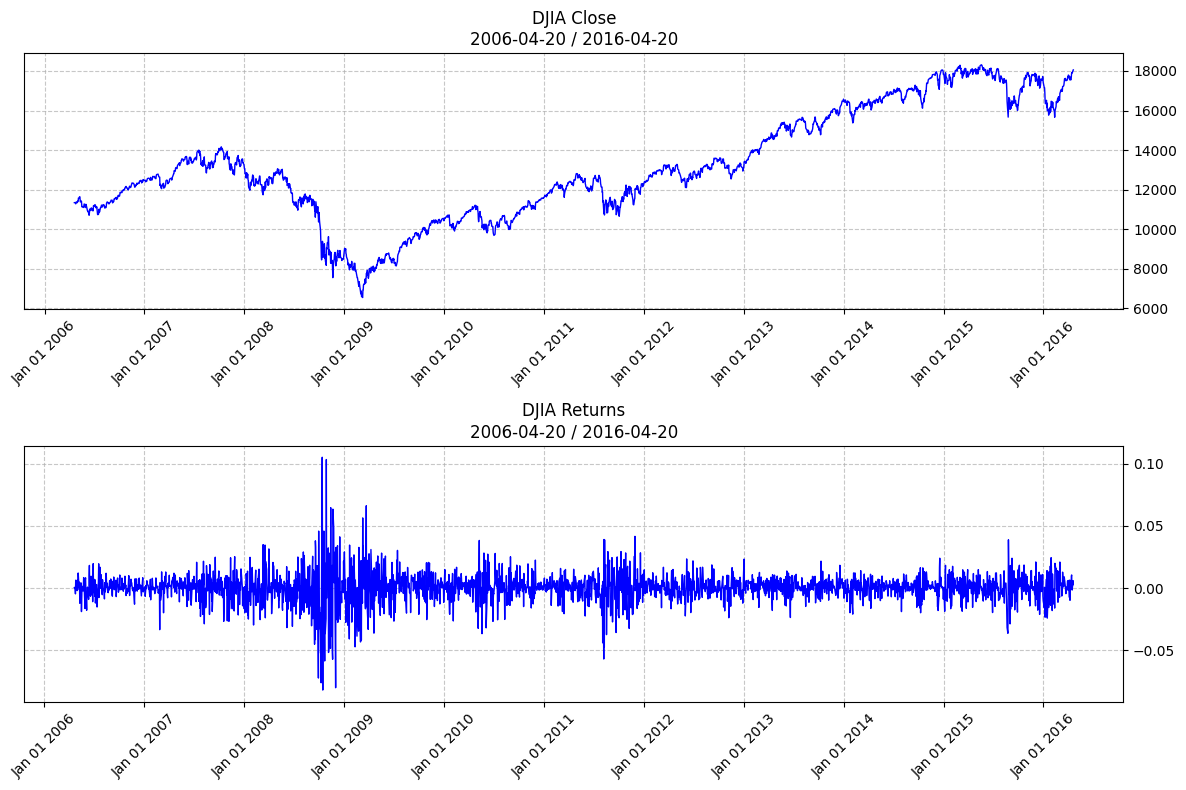

In [8]:
# Import required libraries
import pandas as pd  # For data manipulation and handling time series
import numpy as np  # For numerical operations like log and difference
import matplotlib.pyplot as plt  # For plotting the charts
import matplotlib.dates as mdates  # For formatting dates on the x-axis
import yfinance as yf  # For downloading financial data from Yahoo Finance

# Download Dow Jones Industrial Average (DJIA) data from Yahoo Finance
# '^DJI' is the ticker symbol for DJIA; specify the date range
djia = yf.download('^DJI', start='2006-04-20', end='2016-04-20')
djia = djia[['Close']]  # Keep only the 'Close' column (closing prices)

# Calculate log returns
# Log return = log(Close_t) - log(Close_{t-1}), which approximates percentage change
djia['Log_Return'] = np.log(djia['Close']).diff()

# Set up the figure size for the plot
# figsize=(12, 8) sets the width to 12 inches and height to 8 inches
plt.figure(figsize=(12, 8))

# First subplot: DJIA closing prices
plt.subplot(2, 1, 1)  # Create a subplot: 2 rows, 1 column, 1st plot
plt.plot(djia.index, djia['Close'], color='blue', linewidth=1)  # Plot closing prices with a blue line
plt.title('DJIA Close\n2006-04-20 / 2016-04-20', fontsize=12)  # Set title with date range
plt.ylabel('')  # Leave y-axis label empty to match the original chart
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid for better readability

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  # Format dates as 'Apr 20 2006'
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees to avoid overlap

# Format the y-axis
plt.gca().yaxis.tick_right()  # Move y-axis ticks to the right side
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000

# Second subplot: DJIA log returns
plt.subplot(2, 1, 2)  # Create a subplot: 2 rows, 1 column, 2nd plot
plt.plot(djia.index, djia['Log_Return'], color='blue', linewidth=1)  # Plot log returns with a blue line
plt.title('DJIA Returns\n2006-04-20 / 2016-04-20', fontsize=12)  # Set title with date range
plt.ylabel('')  # Leave y-axis label empty to match the original chart
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid for better readability

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  # Format dates as 'Apr 20 2006'
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees to avoid overlap

# Format the y-axis
plt.gca().yaxis.tick_right()  # Move y-axis ticks to the right side
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))  # Set y-axis ticks at intervals of 0.05

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Display the plot
plt.show()

## White Noise

Mathematically, a white noise process $ w_t $, often denoted as $ w_t \sim \text{wn}(0, \sigma_w^2) $, has the following properties:

- **Uncorrelated over time**: The values of $ w_t $ at different times $ t $ and $ s $ (where $ t \neq s $) are uncorrelated, meaning their covariance is zero: $ \text{Cov}(w_t, w_s) = 0 $.
- **Mean of 0**: The expected value of the noise at any time is zero: $ E[w_t] = 0 $.
- **Constant variance**: The variance of the noise is constant over time: $ \text{Var}(w_t) = \sigma_w^2 $.

When white noise is also specified to be **independent and identically distributed (iid)** with a mean of 0 and variance $ \sigma_w^2 $, it is often referred to as **iid noise** or **independent white noise**, written as $ w_t \sim \text{iid}(0, \sigma_w^2) $. If the noise follows a normal (Gaussian) distribution, it is called **Gaussian white noise**, where $ w_t \sim \text{iid N}(0, \sigma_w^2) $, meaning each $ w_t $ is an independent normal random variable with mean 0 and variance $ \sigma_w^2 $.

In practical terms, white noise is often used in engineering, signal processing, and time series analysis to model random fluctuations or background noise that lack any predictable pattern. For example, the static sound you hear on a detuned radio or TV is an audible representation of white noise.

## Moving Average Model

Suppose we have a white noise process $ w_t $ and we define a process $ v_t $ by

$
v_t = \frac{1}{3}(w_{t-1} + w_t + w_{t+1})
$

$ v_t $ is called a **moving average (MA)** model. 

It smooths the white noise process, which results in time dependence.

- **Mean**: $ E[v_t] = 0 $
- **Variance**: $ \text{Var}(v_t) = \frac{\sigma_w^2}{3} $

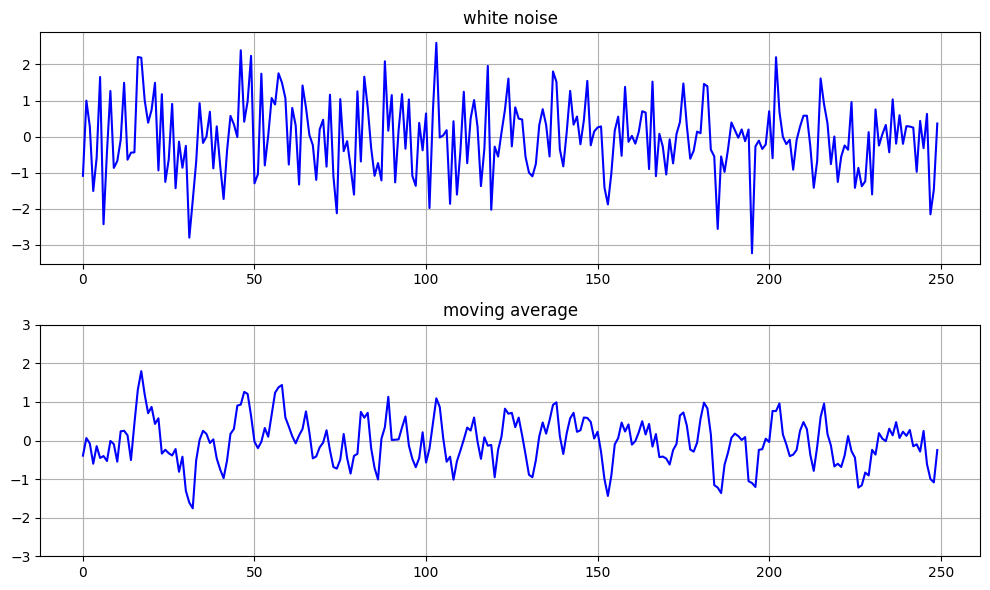

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Set random seed for reproducibility (optional)
np.random.seed(123)

# 1. Generate white noise signal (length 250)
w = np.random.normal(0, 1, 250)  # Mean 0, standard deviation 1

# 2. Apply a 3-point moving average filter
v = uniform_filter1d(w, size=3, mode='nearest')  # Equivalent to R's filter with rep(1/3, 3)

# 3. Plot the results
# Create a figure with 2 subplots (2 rows, 1 column)
plt.figure(figsize=(10, 6))

# Top subplot: White noise
plt.subplot(2, 1, 1)
plt.plot(w, color='blue', label='white noise')
plt.title('white noise')
plt.grid(True)

# Bottom subplot: Moving average filtered signal
plt.subplot(2, 1, 2)
plt.plot(v, color='blue', label='moving average')
plt.title('moving average')
plt.ylim(-3, 3)  # Set y-axis limits to match R code
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

A linear combination of values in a time series (such as our moving average model $ v_t $) is called a **filter**.

For a filter of the form:

$
v_t = \sum_{i=-k}^{k} a_i w_{t-i}
$

where $ w_t \sim \text{wn}(0, \sigma_w^2) $, the variance is:

$
\text{E}(v_t) = 0
$

$
\text{Var}(v_t) = \sigma_w^2 \sum_{i=-k}^{k} a_i^2
$

## Autoregressions

Another way we can construct a dependent process from white noise $ w_t $ is to define:

$x_t = 1.5x_{t-1} + 1.75x_{t-2} + w_t$

For instance:

$
x_1 = 1.5x_0 - 0.75x_{-1} + w_1 = w_1
$

$
x_2 = 1.5x_1 - 0.75x_0 + w_2 = 1.5w_1 + w_2
$

$
x_3 = 1.5x_2 - 0.75x_1 + w_3
$

$
x_4 = 1.5x_3 - 0.75x_2 + w_4
$

This is called an **autoregressive (AR)** model of order 2. ($ x_t $ depends on the two previous values and $ w_t $).  

While we might think of this model for $ -\infty < t < \infty $, if we want to generate it we need some initial condition.

Let's do the example in Python starting from $ t = 1 $ with the initial condition $ x_0 = x_{-1} = 0 $.

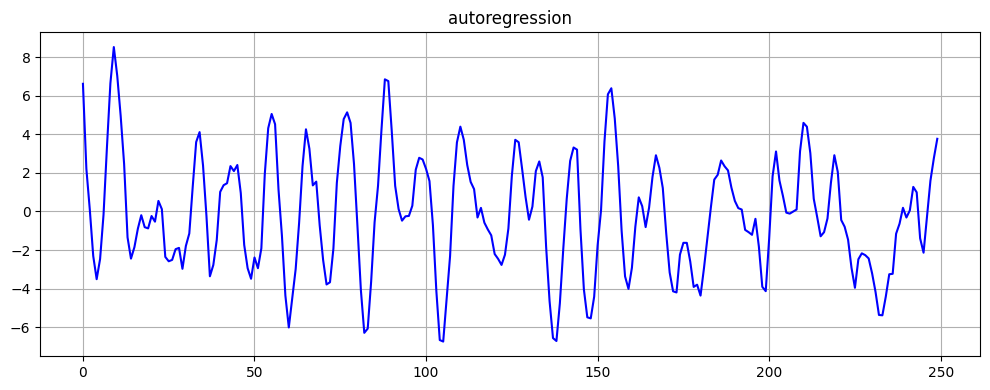

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Set random seed for reproducibility
np.random.seed(123)

# 1. Generate white noise (length 300)
w = np.random.normal(0, 1, 300)  # Mean 0, standard deviation 1

# 2. Apply AR(2) filter: x_t = 1.5 x_{t-1} - 0.75 x_{t-2} + w_t
# The filter coefficients are for the AR part (excluding the 1 for w_t)
ar_coefficients = [1.5, -0.75]  # Coefficients for x_{t-1} and x_{t-2}
# lfilter uses the form: a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... - a[1]*y[n-1] - a[2]*y[n-2] - ...
# For AR(2), b = [1] (for w_t), a = [1, -1.5, 0.75] (1 for y_t, then -phi_1, -phi_2)
x = lfilter([1], [1, -1.5, 0.75], w)

# 3. Discard the first 50 values to avoid startup effects
x = x[50:]  # Keep values from index 50 onward (length 250)

# 4. Plot the result
plt.figure(figsize=(10, 4))
plt.plot(x, color='blue', label='autoregression')
plt.title('autoregression')
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Walk with Drift

Another way we can construct a model is:

$
x_t = \delta + x_{t-1} + w_t
$

Here $\delta$ is some fixed constant called the **drift**. We can also write $x_t$ in the form:

$
x_t = \delta t + \sum_{j=1}^t w_j
$

Let's do an example in Python.

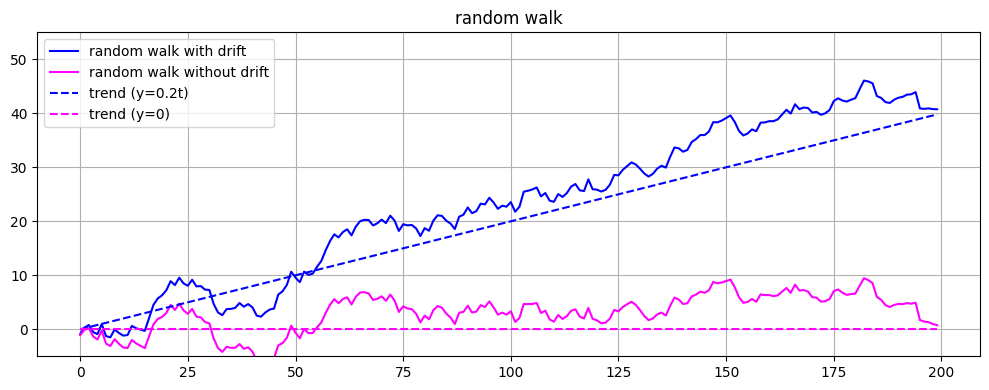

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(123)

# 1. Generate white noise and random walk without drift
w = np.random.normal(0, 1, 200)  # 200 white noise values
x = np.cumsum(w)  # Random walk without drift

# 2. Generate white noise with drift and random walk with drift
wd = w + 0.2  # Add drift of 0.2
xd = np.cumsum(wd)  # Random walk with drift

# 3. Plot the results
plt.figure(figsize=(10, 4))
# Plot random walk with drift (blue)
plt.plot(xd, color='blue', label='random walk with drift')
# Plot random walk without drift (magenta)
plt.plot(x, color='magenta', label='random walk without drift')
# Set y-axis limits
plt.ylim(-5, 55)
# Set title
plt.title('random walk')
# Remove y-axis label
plt.ylabel('')
# Add grid
plt.grid(True)

# 4. Add the trend line y = 0.2t (gray dashed line)
t = np.arange(200)  # Time points 0 to 199
trend1 = 0.2 * t  # Line y = 0.2t
trend2 = 0.0 * t
# Clip the trend line to y-values between 0 and 50
trend_drift = np.clip(trend1, 0, 50)
trend_no_drift = np.clip(trend2, 0, 50)
plt.plot(t, trend_drift, color='blue', linestyle='--', label='trend (y=0.2t)')
plt.plot(t, trend_no_drift, color='magenta', linestyle='--', label='trend (y=0)')

# Add legend
plt.legend()
# Adjust layout
plt.tight_layout()
plt.show()

## Noisy Signal

$ w_t $ can also serve as noise that distorts some deterministic signal (function). For example:

$
x_t = 2 \cos\left(2\pi \frac{t + 15}{50}\right) + w_t
$

is a periodic signal distorted by the white noise process $ w_t $. The amount of distortion depends on $ \sigma_w^2 $. In this case, the problem of interest might be to estimate the deterministic part of the signal from the noisy data.

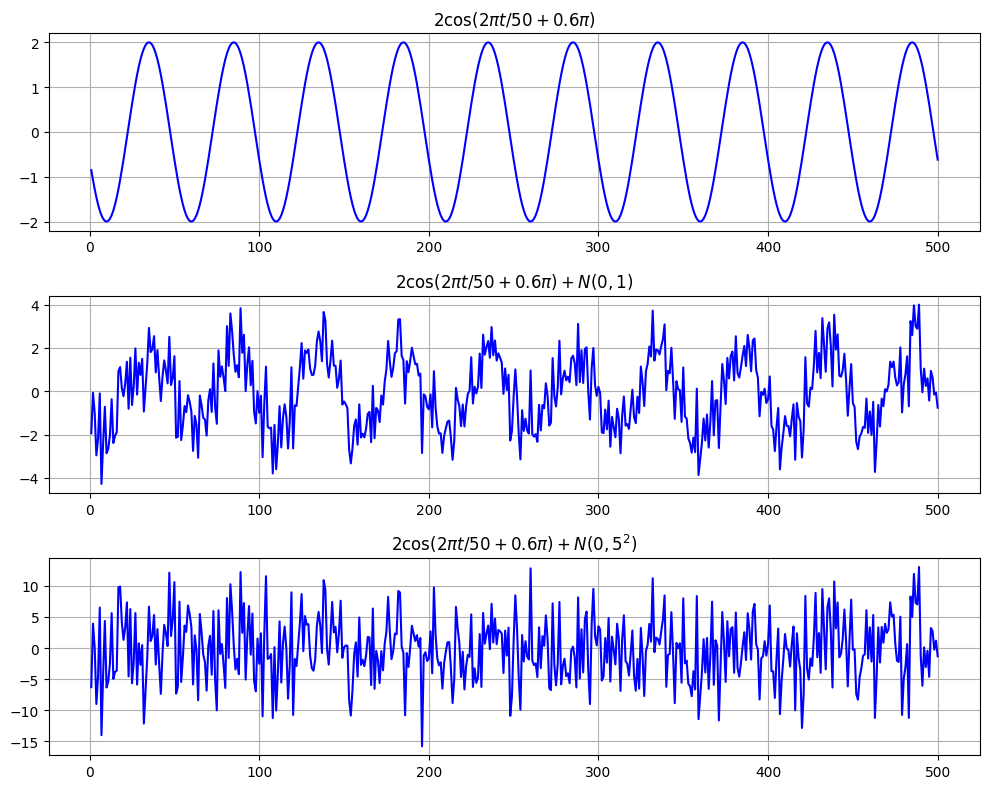

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility (equivalent to R's set.seed)
np.random.seed(123)

# 1. Generate the cosine wave and white noise
t = np.arange(1, 501)  # Time index from 1 to 500 (equivalent to 1:500 in R)
cs = 2 * np.cos(2 * np.pi * (t + 15) / 50)  # Cosine wave: 2*cos(2*pi*(t+15)/50)
w = np.random.normal(0, 1, 500)  # White noise: N(0, 1), length 500

# 2. Set up the plot layout (3 rows, 1 column)
plt.figure(figsize=(10, 8))

# First plot: Pure cosine wave
plt.subplot(3, 1, 1)
plt.plot(t, cs, color='blue')
plt.title(r'$2 \cos(2\pi t / 50 + 0.6\pi)$')
plt.grid(True)

# Second plot: Cosine wave + white noise (variance 1)
plt.subplot(3, 1, 2)
plt.plot(t, cs + w, color='blue')
plt.title(r'$2 \cos(2\pi t / 50 + 0.6\pi) + N(0, 1)$')
plt.grid(True)

# Third plot: Cosine wave + larger white noise (variance 25)
plt.subplot(3, 1, 3)
plt.plot(t, cs + 5 * w, color='blue')
plt.title(r'$2 \cos(2\pi t / 50 + 0.6\pi) + N(0, 5^2)$')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()